<h1 style="text-align: center;">Análisis Sentimientos Twitter</h1>

## Autor: Francisco Lackington

<h3 style="text-align: left;">Descripción del Problema</h3><br>

<div style="text-align: justify"> 
    
- A cntinuación se presenta un problema de análisis de texto: **Extraer el sentimiento asociado a un Tweet**


- El objetivo general es alcanzar el mejor desempeño posible para clasificar si un tweet es positivo o negativo. Para medir el desempeño, se evaluará con un conjunto de datos del cuál no tendrán acceso. De esta manera evitaremos que los modelos aprendan información sobre el conjunto de validación.
</div>



<h3 style="text-align: left;">1.- Preliminares</h3><br>

<div style="text-align: justify"> 
    
1. Para el enunciado planteado, se considera como un **problema de clasificación**, donde el vector objetivo será si el Tweet corressponde a un sentimiento positivo (1) o negativo (0)

    
2. En relación al preprocesamiento inicial se utilizará la función llamada "helpers_tweet". Esta función permite generar las etapas de limpieza de texto y generación de atributos limpios de tweet, con el fin de entregar al modelo la menor cantidad de ruido de los tweets recolectados.
    - Se debe realizar un limpieza del texto de cada Tweet observado, esto para eliminar todo aquelloo conocido como "ruido" y que puede llevar a un mal desempeño en la clasificación de los modelos. Para lo anterior, se debe representar cada oración como un conjunto de características. siguieendo en la misma lógica, se deben eliminar aquellas palabras más comunes (stopwords). Posterior, se realziará una refinación del preprocesamiento utilizando **lematización**. Finalmente, se representará cara oración en un corpus (matriz dispersa) para posterior ser ingresada a los distintos modelos de machine learning.
    - Por otra parte, para el preprocesamiento de los datos si es necesario se utlizarán técnicas de reducción de dimensionalidad (PCA) con el fin de bajar la cantidad de variables (Esto dado que cuando trabajamos con texto, las colummnas crecen dependiendo la longitud y palabras de las oraciones, lo cual puede ser muy costoso)
    

3. Para abarcar este problema se importaran librerias de manipulación de datos, visualización y librerias de sklearn para preprocesamiento, modelamiento de algoritmos de Machine Learning y evaluación de estos. Posterior a esto, se realizará un análisis exploratorio de lo datos, con el fin de conocer la frecuencia de sentiemientos y palabras que existen, las más comunes entre otras.
A continuación, se hará una limpieza y recodificacion de variables del DataSet según corresponda (Imputación de valores nulos y covertir variables categoricas a numericas). Finalmente, se generarán modelos predictivos de acuerdo a la variable objetivo, con el fin de predecir de acuerdo a los datos del Data Set si el Tweet corresponde a un sentimiento positivo o negativo. Se debe considerar que para problemas de análisis de texto, se debe poner énfasis en la etapa de preprocesamiento, dado que en un texto existe una cantidad significativa de ruido, quee podría afectar el desempeño posterior de los modelos.
    
    
Finalmente, se generarán modelos predictivos de acuerdo al vector objetivo, con el fin de predecir de acuerdo a los datos del Data Set si el Tweet es positivo o negativo. Se utlizarán los siguientes modelos apriori:
    - MultinomialNB,
    - DecisionTreeClassifier, 
    - SVC, 
    - LogisticRegression, 
    - GradientBoostingClassifier
    
    
4. Respecto de las métricas que  se utilizará, en razón de ser que tratamos un problema de clasificación, optaremos por las métricas contenidas en un classification report, tales como F1-Score, MacroAVG-F1-Score y Recall para generar comparativas más precisas de cada clase de acuerdo a sus respectivas métricas. Por otra parte la estrategia de división de muestra que se utilizará es train_test_split con **test_size = 0.3** y **random_state = 123** y **stratify = y**.


5. En cuanto a los hiperparámetros que utilizaremos en los modelos, tentativamente serán los siguientes (Se utilizará GridSearch para obtener la combinación óptima de hiperparámteros):
    - MultinomialNB : 'model__alpha':np.logspace(-3, 3, 7)
    - DecisionTreeclassifier : 'dt__ccp_alpha': np.logspace(-4, 0, 5),
                               'dt__min_samples_split': np.arange(0, 1, 0.1)
    - SVC : 'model__kernel': ['poly','rbf','sigmoid'],
            'model__C': np.logspace(-3, 3, 7),
            'model__gamma': ['scale','auto']
    - LogisticRegression : 'model__C': [0.01, 0.1, 0.5, 1.0],
                           'model__penalty': ['l1', 'l2']
    - GradientBoostingClassifier : 'model__learning_rate':[0.01, 0.1, 0.5],
                                   'model__n_estimators':[50,100,500, 1000],
                                   'model__max_depth': [1, 3, 5],
                                   'model__subsample':[0.1, 0.5, 0.9]


</div>



<h3 style="text-align: left;">2.- Aspectos Computacionales</h3><br>

<div style="text-align: justify"> 

- Import necesarios para el tratamiento del set de datos
    
 </div>

In [1]:
# Librerias

import re 
import string

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import helpers_tweet as hpt
import missingno as msgo

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from collections import Counter
from wordcloud import WordCloud 

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.stem import SnowballStemmer, PorterStemmer
from nltk.stem import WordNetLemmatizer

# Global Parameters
stop_words = set(stopwords.words('english'))

from sklearn import set_config
set_config(display = 'diagram')

import pickle

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/francisco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/francisco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Importando el set de datos
df = pd.read_csv('training_tweets.csv').drop(columns = 'Unnamed: 0')
df.head()

,content,sentiment
0,Happy Mama's day to all mothers,love
1,@LysdelTellez I am lost. Please help me find a...,worry
2,"@BoomKatt yes yes I AM, networking whore to th...",happiness
3,you@snapplynn Wish that would have been your t...,neutral
4,now i am doing the MicroEconomics project iha...,worry


<h3 style="text-align: left;">3.- Análisis Exploratorio</h3><br>

<div style="text-align: justify"> 

- En este apartado se estudiará la distribución del vector objetivo y un análisis de palabras más utilizadas así como su frecuencia.
    
 </div>

In [3]:
# Generamos una copia de DataFrame para hacer exploraciones

df_copy = df.copy()

<AxesSubplot:>

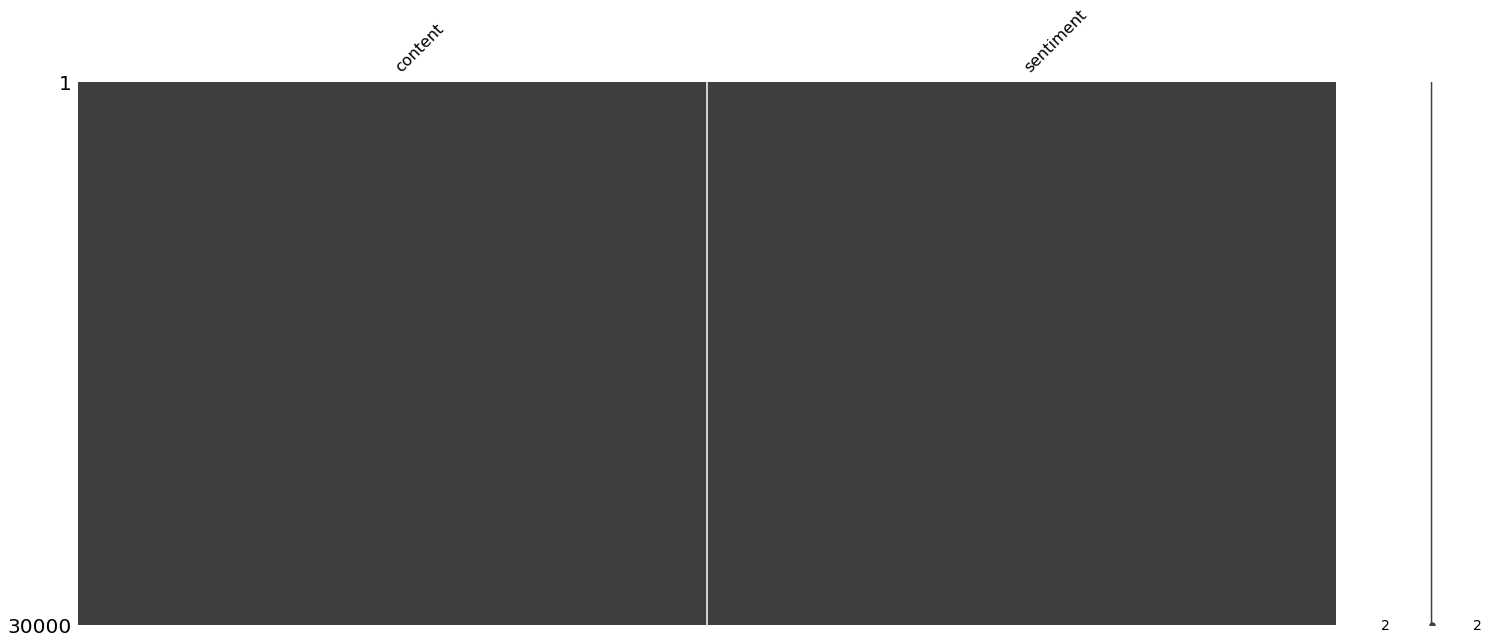

In [4]:
msgo.matrix(df_copy)

- No se observan valores nulos para los tweets obtenidos
- No se observan valores nulos para las categorias (sentimiento) de cada tweet

neutral       6451
worry         6337
happiness     3952
sadness       3869
love          2908
surprise      1619
fun           1331
relief        1158
hate           975
empty          617
enthusiasm     559
boredom        135
anger           89
Name: sentiment, dtype: int64


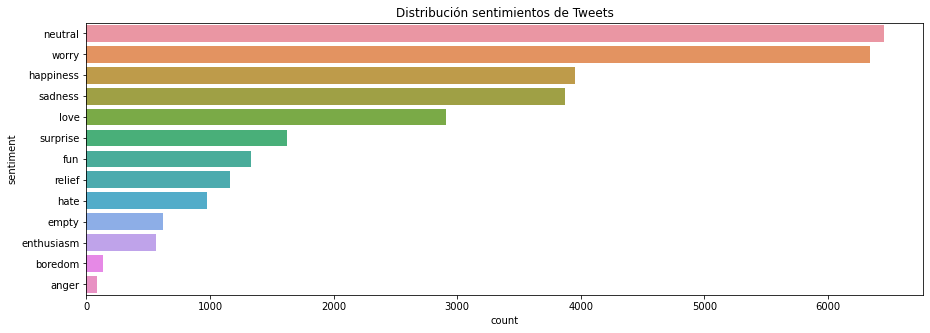

In [5]:
# veamos los tweet por categoria

plt.figure(figsize=(15, 5))
sns.countplot(y = df_copy['sentiment'],
              order = df_copy['sentiment'].value_counts().index)
plt.title('Distribución sentimientos de Tweets');
print(df_copy['sentiment'].value_counts())

- Se observa que existe una gran cantidad de tweets que son clasificados como neutros
- El segundo corresponde al sentimiento **worry**, seguido de **happiness**
- Aquellos sentimientos con menor frecuencia de ocurrencia son los clasificados como **boredom y anger**

In [6]:
# agregando longitud de tweet original y limpio
df_copy['tweet_length'] = df_copy['content'].apply(len)

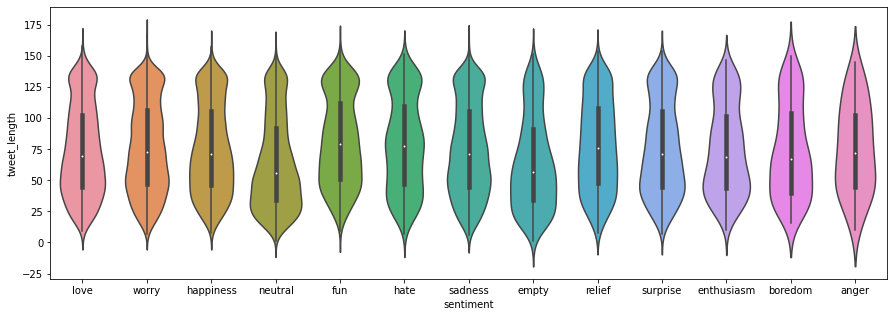

In [7]:
#Gráfico de longitud de los tweets por cada sentimiento

plt.figure(figsize=(15,5))
sns.violinplot(x='sentiment', y='tweet_length', data=df_copy)
plt.show()

- Se observa que aquellos tweets clasificados como **neutral y empty** tienen una cantidad en promedio de 25 caracteres
- Se observa que todas las clasificaciones de tweets tienen una variancia similar en los caracteres del contenido
- Esta variable no será relevante para los posteriores análisis

<h3 style="text-align: left;">4.- Feature Engineering</h3><br>

<div style="text-align: justify"> 

- En este apartado de recodificará el vector objetivo para que sea entendible por los modelos que posteriormente se utilizarán y además se hará el proceso de limpieza de tweets
    
 </div>

In [8]:
# filtrando sin considerar aquellos tweets con sentimiento neutral

df = df[df['sentiment'] != 'neutral']
df.shape

(23549, 2)

In [9]:
# reecodificando lo valores de sentimiento en positiva y negativa
lista = []

for item in df['sentiment']:
    if(
        item == 'happiness' or
        item == 'love' or
        item == 'surprise' or
        item == 'fun' or
        item == 'relief' or
        item ==  'enthusiasm'
    
    ):
        lista.append(1)
    else:
        lista.append(0)

df['sentiment_bin'] = lista

Cantidad de Tweet de acuerdo a su sentimiento 

Negativo (0)	 12022
Positivo (1)	 11527


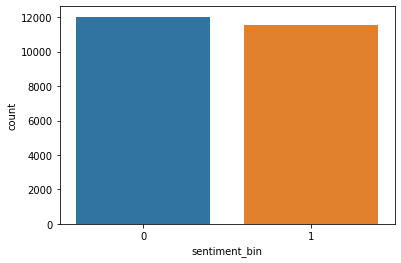

In [10]:
print('Cantidad de Tweet de acuerdo a su sentimiento \n')
print("Negativo (0)\t", len(df[df['sentiment_bin'] == 0]))
print("Positivo (1)\t", len(df[df['sentiment_bin'] == 1]))


sns.countplot(x = df['sentiment_bin']);

- Se observa que realizando la recodificación, los tweets clasificados como **negativos (0)** corresponden al **51%** de la muestra
- Los tweets clasificados como **positivos (1)** corresponden al **49%** de la muestra
- De lo anterior, se observa que existe un balanceo entre las clases de manera equitativa.

In [11]:
# nos aseguramos de pasar el contenido a tipo string
df['content'] = df['content'].astype(str)

In [12]:
# Generando nuestro atributo con el tweet limpio
df, clean_text = hpt.data_limpio(df, 'content')

In [13]:
df.head()

,content,sentiment,sentiment_bin,tweet_limpio
0,Happy Mama's day to all mothers,love,1,happy mamas day mothers
1,@LysdelTellez I am lost. Please help me find a...,worry,0,lost please help find good home
2,"@BoomKatt yes yes I AM, networking whore to th...",happiness,1,yes yes networking whore fullestand girl rih next
4,now i am doing the MicroEconomics project iha...,worry,0,microeconomics project ihate subject beside en...
6,@jackEO313 at first i thought bar life meant y...,fun,1,first thought bar life meant partying nonstop ...


- Se observa que se crea un atributo **tweet_limpio** con todas las reglas de preprocesamiento de expresiones regulares y utilizando **WordNetLemmatizer()**

In [14]:
# Observando palabras mas frecuentes
hpt.palabras_comunes(df, 'tweet_limpio', num = 50)

[('day', 2001),
 ('good', 1835),
 ('get', 1229),
 ('like', 1179),
 ('got', 1149),
 ('love', 1124),
 ('go', 1069),
 ('happy', 1043),
 ('dont', 1030),
 ('today', 995),
 ('cant', 968),
 ('work', 936),
 ('going', 924),
 ('lol', 854),
 ('really', 847),
 ('time', 847),
 ('know', 794),
 ('one', 778),
 ('back', 772),
 ('mothers', 755),
 ('see', 714),
 ('well', 670),
 ('think', 660),
 ('night', 648),
 ('home', 625),
 ('want', 624),
 ('much', 612),
 ('new', 612),
 ('miss', 609),
 ('thanks', 604),
 ('great', 599),
 ('still', 583),
 ('last', 542),
 ('hope', 542),
 ('bad', 536),
 ('sad', 531),
 ('haha', 526),
 ('feel', 506),
 ('morning', 501),
 ('fun', 497),
 ('need', 494),
 ('thats', 492),
 ('sorry', 463),
 ('wish', 432),
 ('didnt', 432),
 ('tomorrow', 428),
 ('twitter', 414),
 ('gon', 407),
 ('nice', 403),
 ('would', 399)]

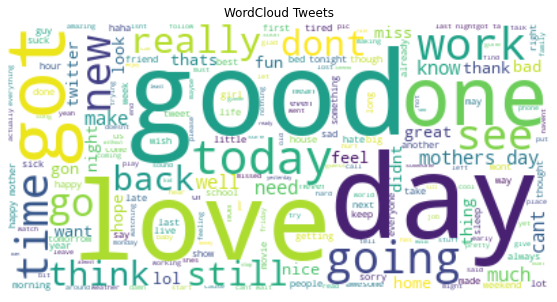

In [15]:
# Generando nube de palabras mas repetidas (texto limpio)
hpt.grafica_worcloud(clean_text)

- Se observa que las palabras más comunes son **day, good, today, love**
- Se observa que aparece la palabra **mother**, por lo que algunos tweets puedden tener relación al día de la madre

In [16]:
# Generando nueestro split
X_train, X_test, y_train, y_test =train_test_split(df['content'],df['sentiment_bin'],
                                                   test_size = 0.3 ,random_state=123)

# Modelos

- Se entrenan 5 modelos con el fin de obtener los dos mejores de acuerdo a su desempeño, en este caso se utilizará la métrica **macro avg f1 score** y se escogerán dichos modelos
- Los modelos se dejan comentados por el tiempo que demoran algunos en generar su reporte de métricas
- Se dejan todos los modelos serializados y cargados para hacer las comparativas respectivas
- Se escogen aquellos dos modelos que mejor desempeño presentan en este entrenamiento

## Modelos Propuestos

```python

%%time
# Modelo LogisticRegression (Tiempo 5 min)

pipe_lr = Pipeline([
                ('tf_df', TfidfVectorizer(analyzer = 'word',
                                          preprocessor = hpt.preprocess_tweet_text,
                                          sublinear_tf=True,
                                          min_df=5,
                                          norm='l2',
                                          ngram_range=(1, 2),
                                          stop_words = stop_words)),
                ('model', LogisticRegression(C = 1.0, penalty='l2'))])



params_lr = {'tf_df__norm':['l1', 'l2'],
             'tf_df__min_df':[1, 3, 5, 7, 10],
             'model__C': [0.01, 0.1, 0.5, 1.0],
             'model__penalty': ['l1', 'l2']
             }

search_lr = GridSearchCV(pipe_lr, params_lr, cv = 5, scoring = 'f1', n_jobs=-1)


search_lr.fit(X_train, y_train)
best_model_lr = search_lr.best_estimator_ # recuperar el mejor modelo

# gnerando las predicciones
y_pred = best_model_lr.predict(X_test)
y_pred_train = best_model_lr.predict(X_train)

# reporte de metricas
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

#------------------------------------------------------------------------
```

```python

%%time
# Modelo MultinomialNB (Tiempo 4 min)
pipe_NB = Pipeline([
                ('tf_df', TfidfVectorizer(analyzer = 'word',
                                          preprocessor = hpt.preprocess_tweet_text,
                                          sublinear_tf=True,
                                          min_df=5,
                                          norm='l2',
                                          ngram_range=(1, 2),
                                          stop_words = stop_words)),
                ('model', MultinomialNB(alpha=0.01))])



params = {'tf_df__norm':['l1', 'l2'],
          'tf_df__min_df':[1, 3, 5, 7, 10],
          'model__alpha':np.logspace(-3, 3, 7)
         }

search_NB = GridSearchCV(pipe_NB, params, cv = 5, scoring = 'f1', n_jobs=-1)


search_NB.fit(X_train, y_train)
best_model_NB = search_NB.best_estimator_ # recuperar el mejor modelo

# gnerando las predicciones
y_pred = best_model_NB.predict(X_test)
y_pred_train = best_model_NB.predict(X_train)

# reporte de metricas
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

#------------------------------------------------------------------------

```

```python

%%time
# Modelo DecisionTree (Tiempo 20 min)
pipe_dt = Pipeline([
                ('tf_df', TfidfVectorizer(analyzer = 'word',
                                          preprocessor = hpt.preprocess_tweet_text,
                                          sublinear_tf=True,
                                          min_df=5,
                                          norm='l2',
                                          ngram_range=(1, 2),
                                          stop_words = stop_words)),
                ('dt', DecisionTreeClassifier(random_state=123))])



params = {'tf_df__norm':['l1', 'l2'],
          'tf_df__min_df':[1, 3, 5, 7, 10],
          'dt__ccp_alpha': np.logspace(-4, 0, 5),
          'dt__min_samples_split': np.arange(0, 1, 0.1)
         }

search_dt = GridSearchCV(pipe_dt, params, cv = 3, scoring = 'f1', n_jobs=-1)


search_dt.fit(X_train, y_train)
best_model_dt = search_dt.best_estimator_ # recuperar el mejor modelo

# gnerando las predicciones
y_pred = best_model_dt.predict(X_test)
y_pred_train = best_model_dt.predict(X_train)

# reporte de metricas
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

#------------------------------------------------------------------------

```

```python

%%time
# Modelo SVC (Tiempo 1:30 hrs)
pipe_svc = Pipeline([
                ('tf_df', TfidfVectorizer(analyzer = 'word',
                                          preprocessor = hpt.preprocess_tweet_text,
                                          sublinear_tf=True,
                                          min_df=5,
                                          norm='l2',
                                          ngram_range=(1, 2),
                                          stop_words = stop_words)),
                ('model', SVC(random_state = 123))])



params = {'tf_df__norm':['l1', 'l2'],
          'tf_df__min_df':[1, 3, 5, 7, 10],
          'model__kernel': ['poly','rbf','sigmoid'],
          'model__C': np.logspace(-3, 3, 7),
          'model__gamma': ['scale','auto']
         }

search_svc = GridSearchCV(pipe_svc, params, cv = 3, scoring = 'f1', n_jobs=-1)


search_svc.fit(X_train, y_train)
best_model_svc = search_svc.best_estimator_ # recuperar el mejor modelo

# gnerando las predicciones
y_pred = best_model_svc.predict(X_test)
y_pred_train = best_model_svc.predict(X_train)

# reporte de metricas
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

#------------------------------------------------------------------------
```

```python
%%time
# Modelo GradientBoosting (Tiempo 1 hr)

pipe_gdb = Pipeline(steps=[
    ('tf_df', TfidfVectorizer(analyzer = 'word',
                                          preprocessor = hpt.preprocess_tweet_text,
                                          sublinear_tf=True,
                                          min_df=5,
                                          norm='l2',
                                          ngram_range=(1, 2),
                                          stop_words = stop_words)),
    ('model', GradientBoostingClassifier(random_state=123))
])

params = {'tf_df__norm':['l1', 'l2'],
          'tf_df__min_df':[1, 3, 5],
          'model__learning_rate':[0.01, 0.1, 0.5],
          'model__n_estimators':[50,100,500, 1000],
          'model__max_depth': [1, 3, 5],
          'model__subsample':[0.1, 0.5, 0.9]}

search_gdb = GridSearchCV(pipe_gdb, params, cv=2, scoring = 'f1', n_jobs=-1)

search_gdb.fit(X_train, y_train)
best_model_gdb = search_gdb.best_estimator_ # recuperar el mejor modelo

y_pred = best_model_gdb.predict(X_test) # predecir en el mejor modelo
y_pred_train = best_model_gdb.predict(X_train)

print(classification_report(y_train, y_pred_train, digits=3))
print(classification_report(y_test, y_pred, digits=3))

#------------------------------------------------------------------------
```

## Serializando Modelos

```python
# Serializando modelos

pickle.dump(best_model_lr, open('modelo_LogisticRegression_tweets.sav', 'wb'))
pickle.dump(best_model_NB, open('modelo_MultinomialNB_tweets.sav', 'wb'))
pickle.dump(best_model_dt, open('modelo_DecisionTree_tweets.sav', 'wb'))
pickle.dump(best_model_svc, open('modelo_svc_tweets.sav', 'wb'))
pickle.dump(best_model_gdb, open('modelo_gdb_tweets.sav', 'wb'))
```

## Cargando Modelos Serializados

In [18]:
# Cargando modelos serializados

lr_model = pickle.load(open('modelo_LogisticRegression_tweets.sav', 'rb'))
nb_model = pickle.load(open('modelo_MultinomialNB_tweets.sav', 'rb'))
dt_model = pickle.load(open('modelo_DecisionTree_tweets.sav', 'rb'))
svc_model = pickle.load(open('modelo_svc_tweets.sav', 'rb'))
gdb_model = pickle.load(open('modelo_gdb_tweets.sav', 'rb'))


## `Reporte: Comparación de modelo`

In [19]:

# Comparando los modelos realizados

modelos = {'LogisticRegression':lr_model, 
           'MultinomialNB':nb_model, 
           'DecisionTree':dt_model,
           'SVC':svc_model,
           'GradientBoosting':gdb_model}
for i, k in modelos.items():
    y_hat = k.predict(X_test)
    print('Metricas para {}'.format(i))
    print(classification_report(y_test, y_hat, digits=3))



Metricas para LogisticRegression
              precision    recall  f1-score   support

           0      0.734     0.766     0.750      3644
           1      0.739     0.705     0.721      3421

    accuracy                          0.736      7065
   macro avg      0.737     0.735     0.736      7065
weighted avg      0.737     0.736     0.736      7065

Metricas para MultinomialNB
              precision    recall  f1-score   support

           0      0.722     0.791     0.755      3644
           1      0.752     0.676     0.712      3421

    accuracy                          0.735      7065
   macro avg      0.737     0.733     0.733      7065
weighted avg      0.737     0.735     0.734      7065

Metricas para DecisionTree
              precision    recall  f1-score   support

           0      0.728     0.662     0.693      3644
           1      0.671     0.736     0.702      3421

    accuracy                          0.698      7065
   macro avg      0.700     0.699     0.

***Comentarios***


- Se observa que todos los modelos presentan un desempeño promedio superior al 65%
- Los mejores modelos de acuerdo a la métrica **macro_avg_f1-score** son: **LogisticRegression y MultinomialNB**, los cuales además presentan las mejores métricas para cada una de las clases.
- Se observa que el modelo **SVC** presenta un **recall** considerable para la clase 1, muy superior a los otros modelos, pero presenta dificultades con la clase 0
- Modelo GradientBoosting tiene aún espacios de mejora, dado que entrega aún un modelo sobreajustado de acuerdo a lo obtenido en el reporte de métricas
- Se puede apreciar que los modelos SVC y DecisionTree fueron aquellos que reportaron el peor desempeño de acuerdo a **macro avg f1-score**.
- Se podría seguir probando nuevas grillas, por asuntos de tiempo no se alcanza para este estudio.

## `Mejores Modelos`

-  Los mejores modelos de acuerdo a la métrica **macro_avg_f1-score** son: `LogisticRegression y MultinomialNB`, los cuales además presentan las mejores métricas para cada una de las clases.
- Se escoge esta métrica (**macro_avg_f1-score**) debido a que el f1-score tiene una mezcla entre recall y precision y **macro_avg** nos entrega un promedio del desempeño entre las clases

In [20]:
# Cargando mejores modelos

lr_model = pickle.load(open('modelo_LogisticRegression_tweets.sav', 'rb'))
nb_model = pickle.load(open('modelo_MultinomialNB_tweets.sav', 'rb'))

In [21]:
# Comparando los modelos realizados

modelos = {'LogisticRegression':lr_model, 
           'MultinomialNB':nb_model}
for i, k in modelos.items():
    y_hat = k.predict(X_test)
    print('Metricas para {}'.format(i))
    print(classification_report(y_test, y_hat, digits=3))

Metricas para LogisticRegression
              precision    recall  f1-score   support

           0      0.734     0.766     0.750      3644
           1      0.739     0.705     0.721      3421

    accuracy                          0.736      7065
   macro avg      0.737     0.735     0.736      7065
weighted avg      0.737     0.736     0.736      7065

Metricas para MultinomialNB
              precision    recall  f1-score   support

           0      0.722     0.791     0.755      3644
           1      0.752     0.676     0.712      3421

    accuracy                          0.735      7065
   macro avg      0.737     0.733     0.733      7065
weighted avg      0.737     0.735     0.734      7065



***Comentarios***

- Se dejan los dos modelos escogidos según el desempeño obtenido en el modelado de acuerdo a la metrica **macro avg f1-score**
- Se observa que LogisticRegression es levemente superior, pero presenta un mejor **recall** para la clase 1

In [22]:
# Probando modelo con tweets ficticios

lr_model.predict([
    "I hate all people in the world",
    "I am very happy to be in this world. Peace and Health for all!",
    "I am very sad"
])

array([0, 1, 0])

- **Se observa que utilizando palabras marcadas de sentimiento (positivo / negativo), el modelo es capaz de predecir correctamente el sentimiento del tweet (Negativo = 0 y Positivo = 1**)
- Se seguirá realizando pruebas para ver si se puede conseguir mejores métricas en los modelos, reforzando la limpieza de los tweets y utilizando nuevas grillas y/o modelos.